# Compound Classification Challenge

This is a notebook for the challenge. For a simple demo, we will use Random Forest with the Morgan fingerprint as our feature vector.

In [2]:
import numpy as np
import pandas as pd
import rdkit.Chem as Chem
import rdkit.Chem.AllChem as AllChem
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics

In [54]:
ls

2-Dimensional-vertical-stacking.jpg  conda_installer.py  __pycache__/
cmpd_clf_demo.ipynb                  environment.png     smilesToMol.png
cmpd.csv                             graph.ipynb         TicketPlace/


## Data

Let's load the compound data file.

In [4]:
ls

 cmpd_clf_demo.ipynb  'Screenshot from 2021-02-16 11-46-05.png'   TicketPlace/


In [5]:
cmpd_df = pd.read_csv('cmpd.csv')
cmpd_df.head()

,inchikey,smiles,group,activity
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active


In [6]:
cmpd_df.shape

(5530, 4)

There are 5530 compound samples with:
* SMILES - 2D compound structure,
* InChIKey - a hash from InChI,
* group - a tag to split the dataset into train and test
* activity - y label

In [7]:
cmpd_df['mol'] = cmpd_df.smiles.apply(Chem.MolFromSmiles)

In [63]:
cmpd_df

,inchikey,smiles,group,activity,mol
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f70f40>
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f70fa0>
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f1a040>
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f1a0a0>
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f1a100>
...,...,...,...,...,...
5525,UBAHPEHGSJRHGA-UHFFFAOYSA-N,Cc1cccc2nc(-c3ccc(-c4cccc(CN5CCC(C(N)=O)CC5)c4...,test,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f5c19e9d6a0>
5526,RTTIKBHDHKOSNI-UHFFFAOYSA-N,Cc1c2ccccc2nc2c1c1cc(NCCN(C)C)ccc1n2CCN(C)C,test,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f5c19e9d700>
5527,HVUOSZANYULBJR-UHFFFAOYSA-N,Cc1ccc(-c2ccn(-c3ccc4c5c(n(C)c4c3)CCCNC5)c(=O)...,test,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f5c19e9d760>
5528,SNFWCJIVWUVRNO-UHFFFAOYSA-N,N#Cc1c(-c2ccccc2C(F)(F)F)nc(SCc2ccc(OC(F)(F)F)...,test,inactive,<rdkit.Chem.rdchem.Mol object at 0x7f5c19e9d7c0>


In [47]:
cmpd_df.smiles[0]

'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1'

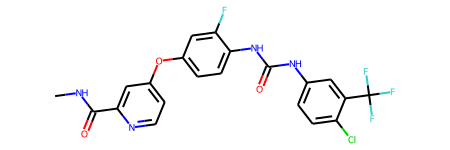

In [37]:
Chem.MolFromSmiles(cmpd_df.smiles[0])

In [49]:
mol = Chem.MolFromSmiles(cmpd_df.smiles[0])
list(Chem.rdmolfiles.CanonicalRankAtoms(mol, breakTies=False))

[0,
 18,
 23,
 2,
 27,
 12,
 25,
 21,
 26,
 11,
 15,
 30,
 20,
 22,
 1,
 19,
 24,
 9,
 14,
 29,
 7,
 31,
 32,
 4,
 4,
 4,
 16,
 28,
 3,
 13,
 10,
 8,
 17]

In [29]:
cmpd_df.head()

,inchikey,smiles,group,activity,mol
0,FNHKPVJBJVTLMP-UHFFFAOYSA-N,CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f70f40>
1,CUDVHEFYRIWYQD-UHFFFAOYSA-N,CNC(=O)c1cccc2cc(Oc3ccnc4cc(OCC5(N)CC5)c(OC)cc...,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f70fa0>
2,TTZSNFLLYPYKIL-UHFFFAOYSA-N,Cc1cc2cc(Oc3ccnc(Nc4cccc(CS(=O)(=O)NCCN(C)C)c4...,test,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f1a040>
3,UOVCGJXDGOGOCZ-UHFFFAOYSA-N,COc1cc2c(cc1F)C(c1ccccc1Cl)=Nc1c(n[nH]c1C)N2,train,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f1a0a0>
4,CUIHSIWYWATEQL-UHFFFAOYSA-N,Cc1ccc(Nc2nccc(N(C)c3ccc4c(C)n(C)nc4c3)n2)cc1S...,test,active,<rdkit.Chem.rdchem.Mol object at 0x7f5c19f1a100>


In [95]:
cmpd_df.smiles[0]

'CNC(=O)c1cc(Oc2ccc(NC(=O)Nc3ccc(Cl)c(C(F)(F)F)c3)c(F)c2)ccn1'

In [67]:
cmpd_df.shape

(5530, 5)

In [8]:
# with minimal modification, we obtain the fingerprint vector using RDKit

def get_Xy(df):
    X = np.vstack(df.mol.apply(lambda m: list(AllChem.GetMorganFingerprintAsBitVect(m, 4, nBits=2048))))
    y = df.activity.eq('active').astype(float).to_numpy()
    return X, y

In [66]:
type(cmpd_df.mol[0])

rdkit.Chem.rdchem.Mol

In [9]:
X_train, y_train = get_Xy(cmpd_df[cmpd_df.group.eq('train')])
X_test, y_test = get_Xy(cmpd_df[cmpd_df.group.eq('test')])

In [58]:
X_train.shape

(3977, 2048)

In [60]:
y_train

array([1., 1., 1., ..., 0., 0., 0.])

In [61]:
y_train.shape

(3977,)

## Model: Random Forest

Probably, RF is the simplest classifier for numerical feature vectors without much tuning, and that gives us a start point of our model exploration.

In [10]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.866709594333548

In [11]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [12]:
# logloss
metrics.log_loss(y_test, y_pred, labels=[0, 1])

0.4193165149792068

In [13]:
# AUC PRC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
metrics.auc(recall, precision)

0.8788119374442863

In [14]:
# AUC ROC
fpr_roc, tpr_roc, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr_roc, tpr_roc)

0.8900911366870192

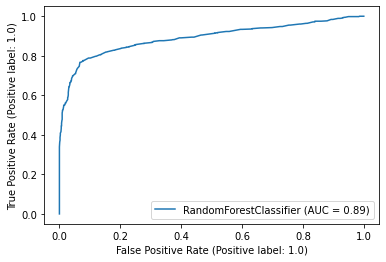

In [28]:
from sklearn import metrics
metrics.plot_roc_curve(clf, X_test, y_test)  
plt.show()

-----------------------------------------

-----------------------------------------

### First approach: Convert smiles to LogP, MW and RB descriptors

I did some research and got to know that I can represent each of the molecules by a set of molecular descriptors:
- cLogP (Octanol-water partition coefficient)
- MW (Molecular weight)
- RB (Number of rotatable bonds)

Therefore, I will use those above descriptors to train ML models with a tabular-like data.

In [79]:
import numpy as np
from rdkit.Chem import Descriptors

def generate(smiles, verbose=False):

    moldata= []
    for elem in smiles:
        mol=Chem.MolFromSmiles(elem) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_MolWt = Descriptors.MolWt(mol)
        desc_NumRotatableBonds = Descriptors.NumRotatableBonds(mol)
           
        row = np.array([desc_MolLogP,
                        desc_MolWt,
                        desc_NumRotatableBonds])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MolLogP","MolWt","NumRotatableBonds"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [80]:
df = generate(cmpd_df.smiles)
df

,MolLogP,MolWt,NumRotatableBonds
0,5.68880,482.821,5.0
1,4.41860,443.503,7.0
2,3.78322,480.594,10.0
3,4.74532,356.788,2.0
4,3.13904,437.529,5.0
...,...,...,...
5525,5.53592,538.570,5.0
5526,4.18622,389.547,7.0
5527,3.73542,384.483,2.0
5528,5.51828,471.382,5.0


Also, I used one extra discriptor which is aromatic proportion descriptor. The AromaticAtoms following function is used to calculate the aromatic proportion.

In [81]:
def AromaticAtoms(m):
    aromatic_atoms = [m.GetAtomWithIdx(i).GetIsAromatic() for i in range(m.GetNumAtoms())]
    aa_count = []
    for i in aromatic_atoms:
        if i==True:
            aa_count.append(1)
    sum_aa_count = sum(aa_count)
    return sum_aa_count
desc_AromaticProportion = [AromaticAtoms(element)/Descriptors.HeavyAtomCount(element) for element in cmpd_df.mol]
desc_AromaticProportion = pd.DataFrame(desc_AromaticProportion, columns=["AromaticProportion"])
desc_AromaticProportion.head()

,AromaticProportion
0,0.545455
1,0.606061
2,0.617647
3,0.680000
4,0.677419


Then two dataframes are mergerd into one dataframe (a.k.a **df**)

In [82]:
df = pd.concat([df,desc_AromaticProportion], axis=1)
df.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,5.68880,482.821,5.0,0.545455
1,4.41860,443.503,7.0,0.606061
2,3.78322,480.594,10.0,0.617647
3,4.74532,356.788,2.0,0.680000
4,3.13904,437.529,5.0,0.677419


In [83]:
df = pd.concat([df,cmpd_df.group], axis=1)
df = pd.concat([df,cmpd_df.activity], axis=1)
df.head(2)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,group,activity
0,5.6888,482.821,5.0,0.545455,train,active
1,4.4186,443.503,7.0,0.606061,train,active


In [85]:
def get_Xy(df):
    X = df[['MolLogP',"MolWt","NumRotatableBonds",'AromaticProportion']]
    y = df.activity.eq('active').astype(float).to_numpy()
    return X, y
X_train, y_train = get_Xy(df[df.group.eq('train')])
X_test, y_test = get_Xy(df[df.group.eq('test')])

In [88]:
X_train, y_train

(      MolLogP    MolWt  NumRotatableBonds  AromaticProportion
 0     5.68880  482.821                5.0            0.545455
 1     4.41860  443.503                7.0            0.606061
 3     4.74532  356.788                2.0            0.680000
 5     5.76650  512.441                9.0            0.628571
 7     4.07190  426.860                6.0            0.533333
 ...       ...      ...                ...                 ...
 4966  2.56110  292.294                2.0            0.772727
 4968  4.59032  493.615                7.0            0.648649
 4969  2.99510  352.417                3.0            0.653846
 4970  4.21010  394.498                3.0            0.586207
 4971  3.07930  353.401                4.0            0.653846
 
 [3977 rows x 4 columns],
 array([1., 1., 1., ..., 0., 0., 0.]))

In [89]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.6883451384417257

In [90]:
y_pred = clf.predict_proba(X_test)[:, 1]

In [91]:
# logloss
metrics.log_loss(y_test, y_pred, labels=[0, 1])

0.5975003829466675

In [92]:
# AUC PRC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
metrics.auc(recall, precision)

0.6361136013676696

In [93]:
# AUC ROC
fpr_roc, tpr_roc, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr_roc, tpr_roc)

0.7435213702923218

In [ ]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='sigmoid'))

# Compile the network :
NN_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN_model.summary()

# Define a checkpoint callback :
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]
# train model
NN_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

In [ ]:
y_pred = NN_model.predict_proba(X_test).reshape(1553,)
y_pred.shape

In [ ]:
# logloss
metrics.log_loss(y_test, y_pred, labels=[0, 1])

In [ ]:
# AUC PRC
precision, recall, _ = metrics.precision_recall_curve(y_test, y_pred, pos_label=1)
metrics.auc(recall, precision)

In [ ]:
# AUC ROC
fpr_roc, tpr_roc, _ = metrics.roc_curve(y_test, y_pred, pos_label=1)
metrics.auc(fpr_roc, tpr_roc)

## Hints

Although AUCPRC and AUCROC are already quite high, one may suspect possible overfitting since the dimension of features is 2048, and the number of train samples is 3977. Indeed, it is the case, but a simple regularization with some hyperparam tuning of the RF and/or the Morgan fingerprint does not improve the result significantly. Note that some graph-based deep learning models with minimal tuning easily get you have both AUCPRC and AUCROC > 0.93, and logloss < 0.35.

Also, remember that you may freely use other open resources. For example, there are many many compound samples in PubChem, ChEMBL, ChEBI, ..., and most compounds there are not likely "active".